In [3]:
"""@author Okorie Ndubuisi 
Created: February 2025
Last Modified: March 2025
"""
import numpy as np
import matplotlib.pyplot as plt
from binarylogisticregression import BinaryLogisticRegression
#import seaborn as sns
import pandas as pd
import math
#sns.set()

In [4]:
model = BinaryLogisticRegression()

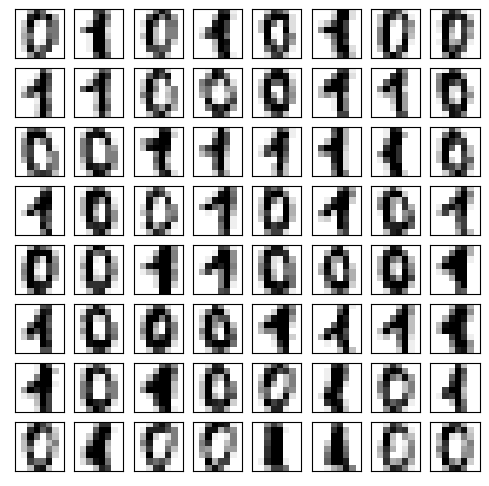

In [5]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=2)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [6]:
X = digits.data[:200, :]
Y = digits.target[:200]

X_test = digits.data[200:, :]
Y_true = digits.target[200:]
print(X[0])
Y[0]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


0

In [7]:
print(X.shape)
print(Y.shape)

print(X_test.shape)
print(Y_true.shape)

(200, 64)
(200,)
(160, 64)
(160,)


In [19]:
np.random.seed(42)
w = np.random.randn(64, 1) 
b = 0.7
alpha = 9e-3
lambda_ = 0.7
num_iters = 100_000
decimals = 8

The code below will take long to execute

In [20]:
w, b, J_history, w_history = model.fit(X, Y[:,np.newaxis], w, b, alpha, num_iters, lambda_, decimals)

Iteration    0: Cost 10.53995698   
Iteration 10000: Cost 0.04567593   
Iteration 20000: Cost 0.02444617   
Iteration 30000: Cost 0.01314648   
Iteration 40000: Cost 0.00714191   
Iteration 50000: Cost 0.00396971   
Iteration 60000: Cost 0.00231236   
Iteration 70000: Cost 0.00145812   
Iteration 80000: Cost 0.00102601   
Iteration 90000: Cost 0.00080871   
Iteration 99999: Cost 0.00069839   


In [21]:
print(w.shape)
print(b.shape)

(64, 1)
(1,)


In [22]:
b

array([0.7343245])

In [23]:
w

array([[ 0.0212842 ],
       [-0.00567678],
       [ 0.04698514],
       [-0.0118251 ],
       [-0.00545383],
       [ 0.10123283],
       [ 0.1048201 ],
       [ 0.03288458],
       [-0.02011698],
       [ 0.01797501],
       [-0.07679343],
       [-0.06814742],
       [ 0.01181067],
       [-0.04819472],
       [-0.02733201],
       [-0.02409402],
       [-0.04339981],
       [-0.00506901],
       [-0.10093305],
       [ 0.05548012],
       [ 0.17458378],
       [-0.05420654],
       [ 0.01206205],
       [-0.06105046],
       [-0.0233268 ],
       [-0.00623848],
       [-0.03609229],
       [ 0.19952165],
       [ 0.17705028],
       [-0.03896522],
       [-0.06953632],
       [ 0.07937012],
       [-0.00057836],
       [-0.08985893],
       [-0.01427475],
       [ 0.09658199],
       [ 0.19631416],
       [-0.10490621],
       [-0.11610874],
       [ 0.0084355 ],
       [ 0.03164329],
       [-0.03362559],
       [-0.120055  ],
       [ 0.05959238],
       [ 0.10028509],
       [-0

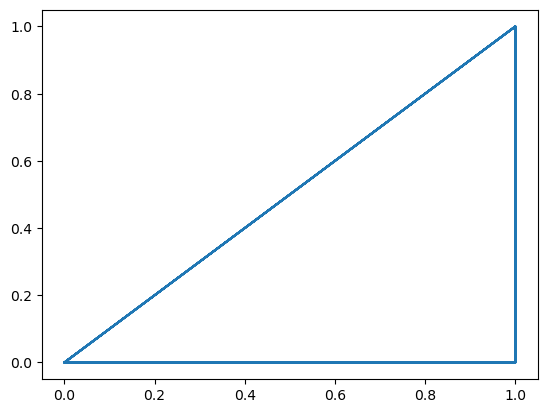

In [11]:
predictions = model.predict(X_test, w, b)
plt.plot(Y_true, predictions);

In [12]:
errors = np.where(Y_true != predictions)
df = pd.DataFrame({'Predictions': predictions[errors], 'Y_true': Y_true[errors]})
df

,Predictions,Y_true
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1


In [13]:
model.accuracy(Y_true)

95.0

In [14]:
model.error(Y_true)

5.0

In [15]:
count, values = model.error_count(Y_true)
print(count)
print(values['Actual'])
print(values['Predicted'])

8
[1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0]


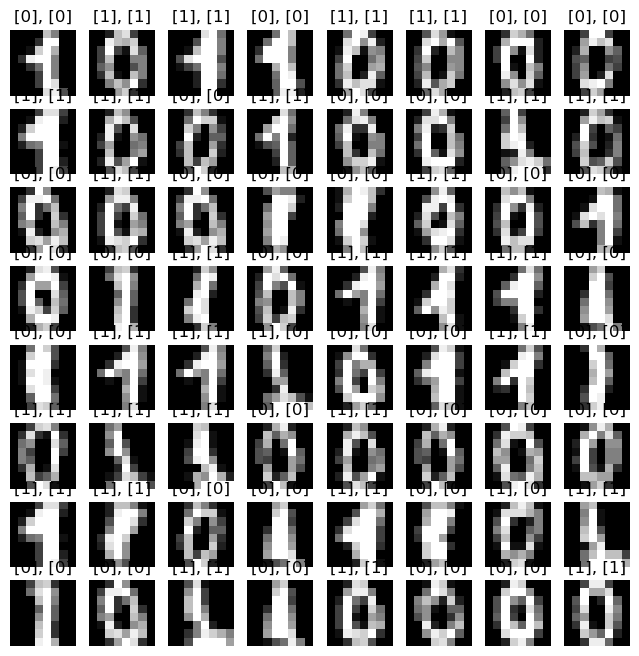

In [16]:
errors = np.where(Y_true != predictions)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, 160, 1)
    X_random_reshaped = X[random_index].reshape((8, 8))
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(f"{Y_true[random_index]}, {predictions[random_index]}")
    ax.set_axis_off() 
plt.axis('off')
plt.show()

In [15]:
X2 = digits.data
Y2 = digits.target
print(X2.shape)

(360, 64)


In [16]:
model2 = BinaryLogisticRegression()

In [17]:
np.random.seed(42)
w = np.random.random(64) 
b = 0.7
alpha = 9.0e-4
lambda_ = 0.7
num_iters = 1_000
decimals = 8
slice = 200
k = 10

In [18]:
#CV_k = model2.kfold_cv(X2, Y2, w_in, b_in, k, alpha, num_iters, lambda_, decimals)

In [19]:
#print('CV_k =', CV_k)

In [20]:
heart = pd.read_csv('data/heart.csv')

In [21]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [23]:
heart = pd.get_dummies(data = heart, prefix = cat_variables, columns = cat_variables, dtype=int)

In [24]:
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [25]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    int32  
 8   Sex_M              918 non-null    int32  
 9   ChestPainType_ASY  918 non-null    int32  
 10  ChestPainType_ATA  918 non-null    int32  
 11  ChestPainType_NAP  918 non-null    int32  
 12  ChestPainType_TA   918 non-null    int32  
 13  RestingECG_LVH     918 non-null    int32  
 14  RestingECG_Normal  918 non-null    int32  
 15  RestingECG_ST      918 non-null    int32  
 16  ExerciseAngina_N   918 non

In [26]:
target = np.array(heart['HeartDisease'])
Y_train_target = target[:800]
target.shape

(918,)

In [27]:
Y_train_target.shape

(800,)

In [28]:
features = heart.drop('HeartDisease', axis=1)
features = np.array(features)
X_train_features = features[:800,:]
features.shape

(918, 20)

In [29]:
X_train_features.shape

(800, 20)

In [30]:
heart_model = BinaryLogisticRegression()

In [31]:
test_features = features[800:, :]
test_target = target[800:]
print(test_features.shape)
print(test_target.shape)

(118, 20)
(118,)


In [32]:
w = np.random.randn(20,1) 
b = 0.7
alpha = 9.0e-5
lambda_ = 0.7
num_iters = 1_000
decimals = 8

In [33]:
w, b, J_history, w_history = heart_model.fit(X_train_features, Y_train_target,  w, b, alpha, num_iters, lambda_, decimals)

Iteration    0: Cost 9392.71792285   
Iteration  100: Cost 2130.12293657   
Iteration  200: Cost 1988.75869630   
Iteration  300: Cost 423.93107264   
Iteration  400: Cost 132.58253107   
Iteration  500: Cost 45.30059199   
Iteration  600: Cost 28.64529167   
Iteration  700: Cost 23.66885451   
Iteration  800: Cost 21.30469828   
Iteration  900: Cost 20.06108225   
Iteration  999: Cost 19.33770286   


In [34]:
predictions = heart_model.predict(test_features, w, b)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
heart_model.accuracy(test_target)

53.38983050847458

In [36]:
obesity = pd.read_csv('data/obesity.csv')

In [37]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [38]:
obesity_cat_variables = ['Gender',
'family_history_with_overweight',
'FAVC',
'CAEC',
'SMOKE',
'SCC', 
'CALC', 
'MTRANS', 
]

In [39]:
obesity = pd.get_dummies(data=obesity, prefix=obesity_cat_variables, columns=obesity_cat_variables, dtype=int)

In [40]:
obesity.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [41]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   int64  
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   NObeyesdad                          2111 non-null   object 
 9   Gender_Female                       2111 non-null   int32  
 10  Gender_Male                         2111 non-null   int32  
 11  family_history_with_overweight_no   2111 no

In [42]:
np.where(obesity.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [43]:
obesity.groupby('NObeyesdad').count()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
NObeyesdad,,,,,,,,,,,,,,,,,,,,,
Insufficient_Weight,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
Normal_Weight,287,287,287,287,287,287,287,287,287,287,...,287,287,287,287,287,287,287,287,287,287
Obesity_Type_I,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351
Obesity_Type_II,297,297,297,297,297,297,297,297,297,297,...,297,297,297,297,297,297,297,297,297,297
Obesity_Type_III,324,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
Overweight_Level_I,290,290,290,290,290,290,290,290,290,290,...,290,290,290,290,290,290,290,290,290,290
Overweight_Level_II,290,290,290,290,290,290,290,290,290,290,...,290,290,290,290,290,290,290,290,290,290


In [44]:
types = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
obesity['NObeyesdad'] = obesity['NObeyesdad'].apply(lambda x: types.index(x))

In [45]:
obesity.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,0,...,0,0,1,0,0,0,0,0,0,1
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
Y = np.array(obesity['NObeyesdad'])
Y.shape

(2111,)

In [47]:
X = np.array(obesity.drop('NObeyesdad', axis=1))

In [48]:
X.shape

(2111, 31)

In [49]:
X_train = X[:1500, :]
Y_train = Y[:1500]

X_test = X[1500:, :]
Y_test = Y[1500:]
print(Y_test.shape)

(611,)


In [50]:
obesity_model = BinaryLogisticRegression()

In [51]:
scaled_X_train = obesity_model.adapt(X_train)
scaled_X_test = obesity_model.min_max_scale(X_test)

In [52]:
np.random.seed(42)
w = np.random.randn(31, 1) 
b = 0
alpha = 9e-09
lambda_ = 5
num_iters = 1_000
decimals = 8

In [53]:
w, b, J_history, w_history = obesity_model.fit(scaled_X_train, Y_train, w, b, alpha, num_iters, lambda_, decimals)

Iteration    0: Cost 2756.35510166   
Iteration  100: Cost 2756.34073228   
Iteration  200: Cost 2756.32636292   
Iteration  300: Cost 2756.31199355   
Iteration  400: Cost 2756.29762419   
Iteration  500: Cost 2756.28325483   
Iteration  600: Cost 2756.26888547   
Iteration  700: Cost 2756.25451611   
Iteration  800: Cost 2756.24014676   
Iteration  900: Cost 2756.22577741   
Iteration  999: Cost 2756.21155175   


In [54]:
predictions = obesity_model.predict(X_test, w, b)

In [55]:
obesity_model.accuracy(Y_test)

0.0